<a href="https://colab.research.google.com/github/dcantu88/Boston-House-Prediction/blob/main/Learners_Notebook_Boston_house_price_Full%2BCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
#Import data manipulation libraries
import numpy as np
import pandas as pd

#Import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

#Import Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Loading the dataset

In [ ]:
#Load dataset from a CSV file
file_path = "Boston.csv"
boston_df = pd.read_csv(file_path)

#Display the first 5 rows of the dataset
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


## Data Overview

- **Observations**:
- CRIM: Crime rate per capita; varies (0.00632 to 88.98).
- ZN: Residential land zoned; significant variation (0.0 to 100.0).
- INDUS: Non-retail business acres; diverse levels (0.46 to 27.74).
- CHAS: Tracts near Charles River; few tracts (0 or 1).
- NOX: Nitric oxide concentration; different pollution levels (0.385 to 0.871).
- RM: Average rooms per dwelling; varied house sizes (3.561 to 8.780).
- AGE: Proportion of old houses; wide range (2.9% to 100%).
- DIS: Distance to employment centers; varies (1.13 to 12.13).
- RAD: Highway accessibility index; significant variation (1 to 24).
- TAX: Property tax rate; different rates (187 to 711 per $10,000).

- PTRATIO: Pupil-teacher ratio, educational resources vary (12.6 to 22.0).
- LSTAT: Lower status population percentage; socioeconomic diversity (1.73% to 37.97%).
- MEDV: Median home value; wide price range (5,000 to 50,000).

- **Statistics**:
  - Mean values indicate central tendencies
  - Standard deviations show variability
  - No missing values, ensuring complete data for analysis.


- **Sanity checks**:
  - Data Types: Verify that numeric columns are correctly identified for analysis.

In [ ]:
#Statistics Summary
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [ ]:
#Check if there are missing values
print(boston_df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
#Check for duplicates
print(boston_df.duplicated().sum())

0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
  *   The distribution of 'MEDV' shows a slight right skew.

 *  The most frequent values are around \$20,000 to \$25,000.
 *  There are some high-value outliers beyond $50,000.

2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?

  *   MEDV is positively correlated with RM (average number of rooms per dwelling) with a correlation coefficient of 0.7.
  *   MEDV is negatively correlated with LSTAT (percentage of lower status population) with a correlation coefficient of -0.74.
  *   High correlation between TAX and RAD (0.91) suggests potential multicollinearity issues.
  *  There are other moderate correlations indicating relationships between various features.

3. What are all the inferences that can be found by doing univariate analysis for different variables?

  *   CRIM Highly skewed distribution
  *   ZN Most values are 0 indicating many areas with no residential land zones
  *   INDUS Skewed distribution towards lower values
  *   LSTAT Skewed distribution with most values below 20
  *   PSTRATIO: Most values are between 17 and 21
  
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

  *   RM vs. MEDV: Positive correlation; as the number of rooms increases, the median value of homes also increases.
  *   LSTAT vs. MEDV: Negative correlation; higher percentage of lower status population correlates with lower median home values.
  *  TAX vs. RAD: Positive correlation; higher property tax rates are associated with better accessibility to radial highways.








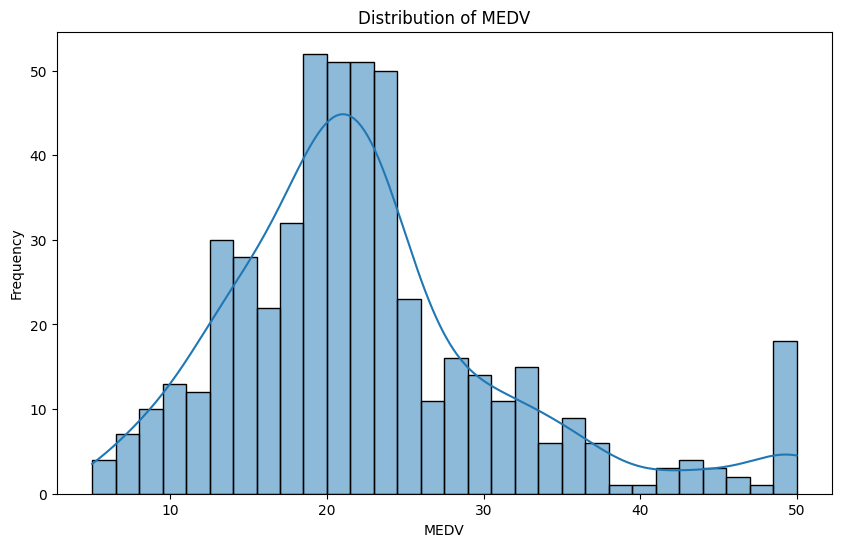

In [ ]:
# Distribution of MEDV
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['MEDV'], kde=True, bins=30)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

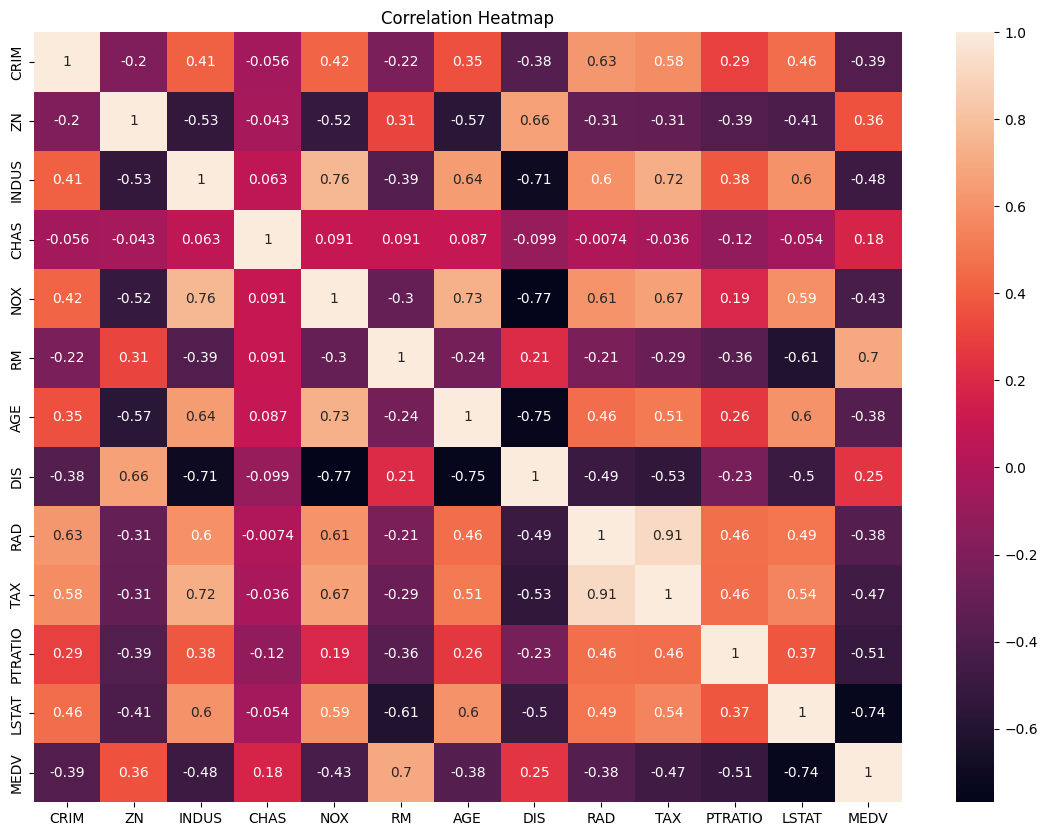

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = boston_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

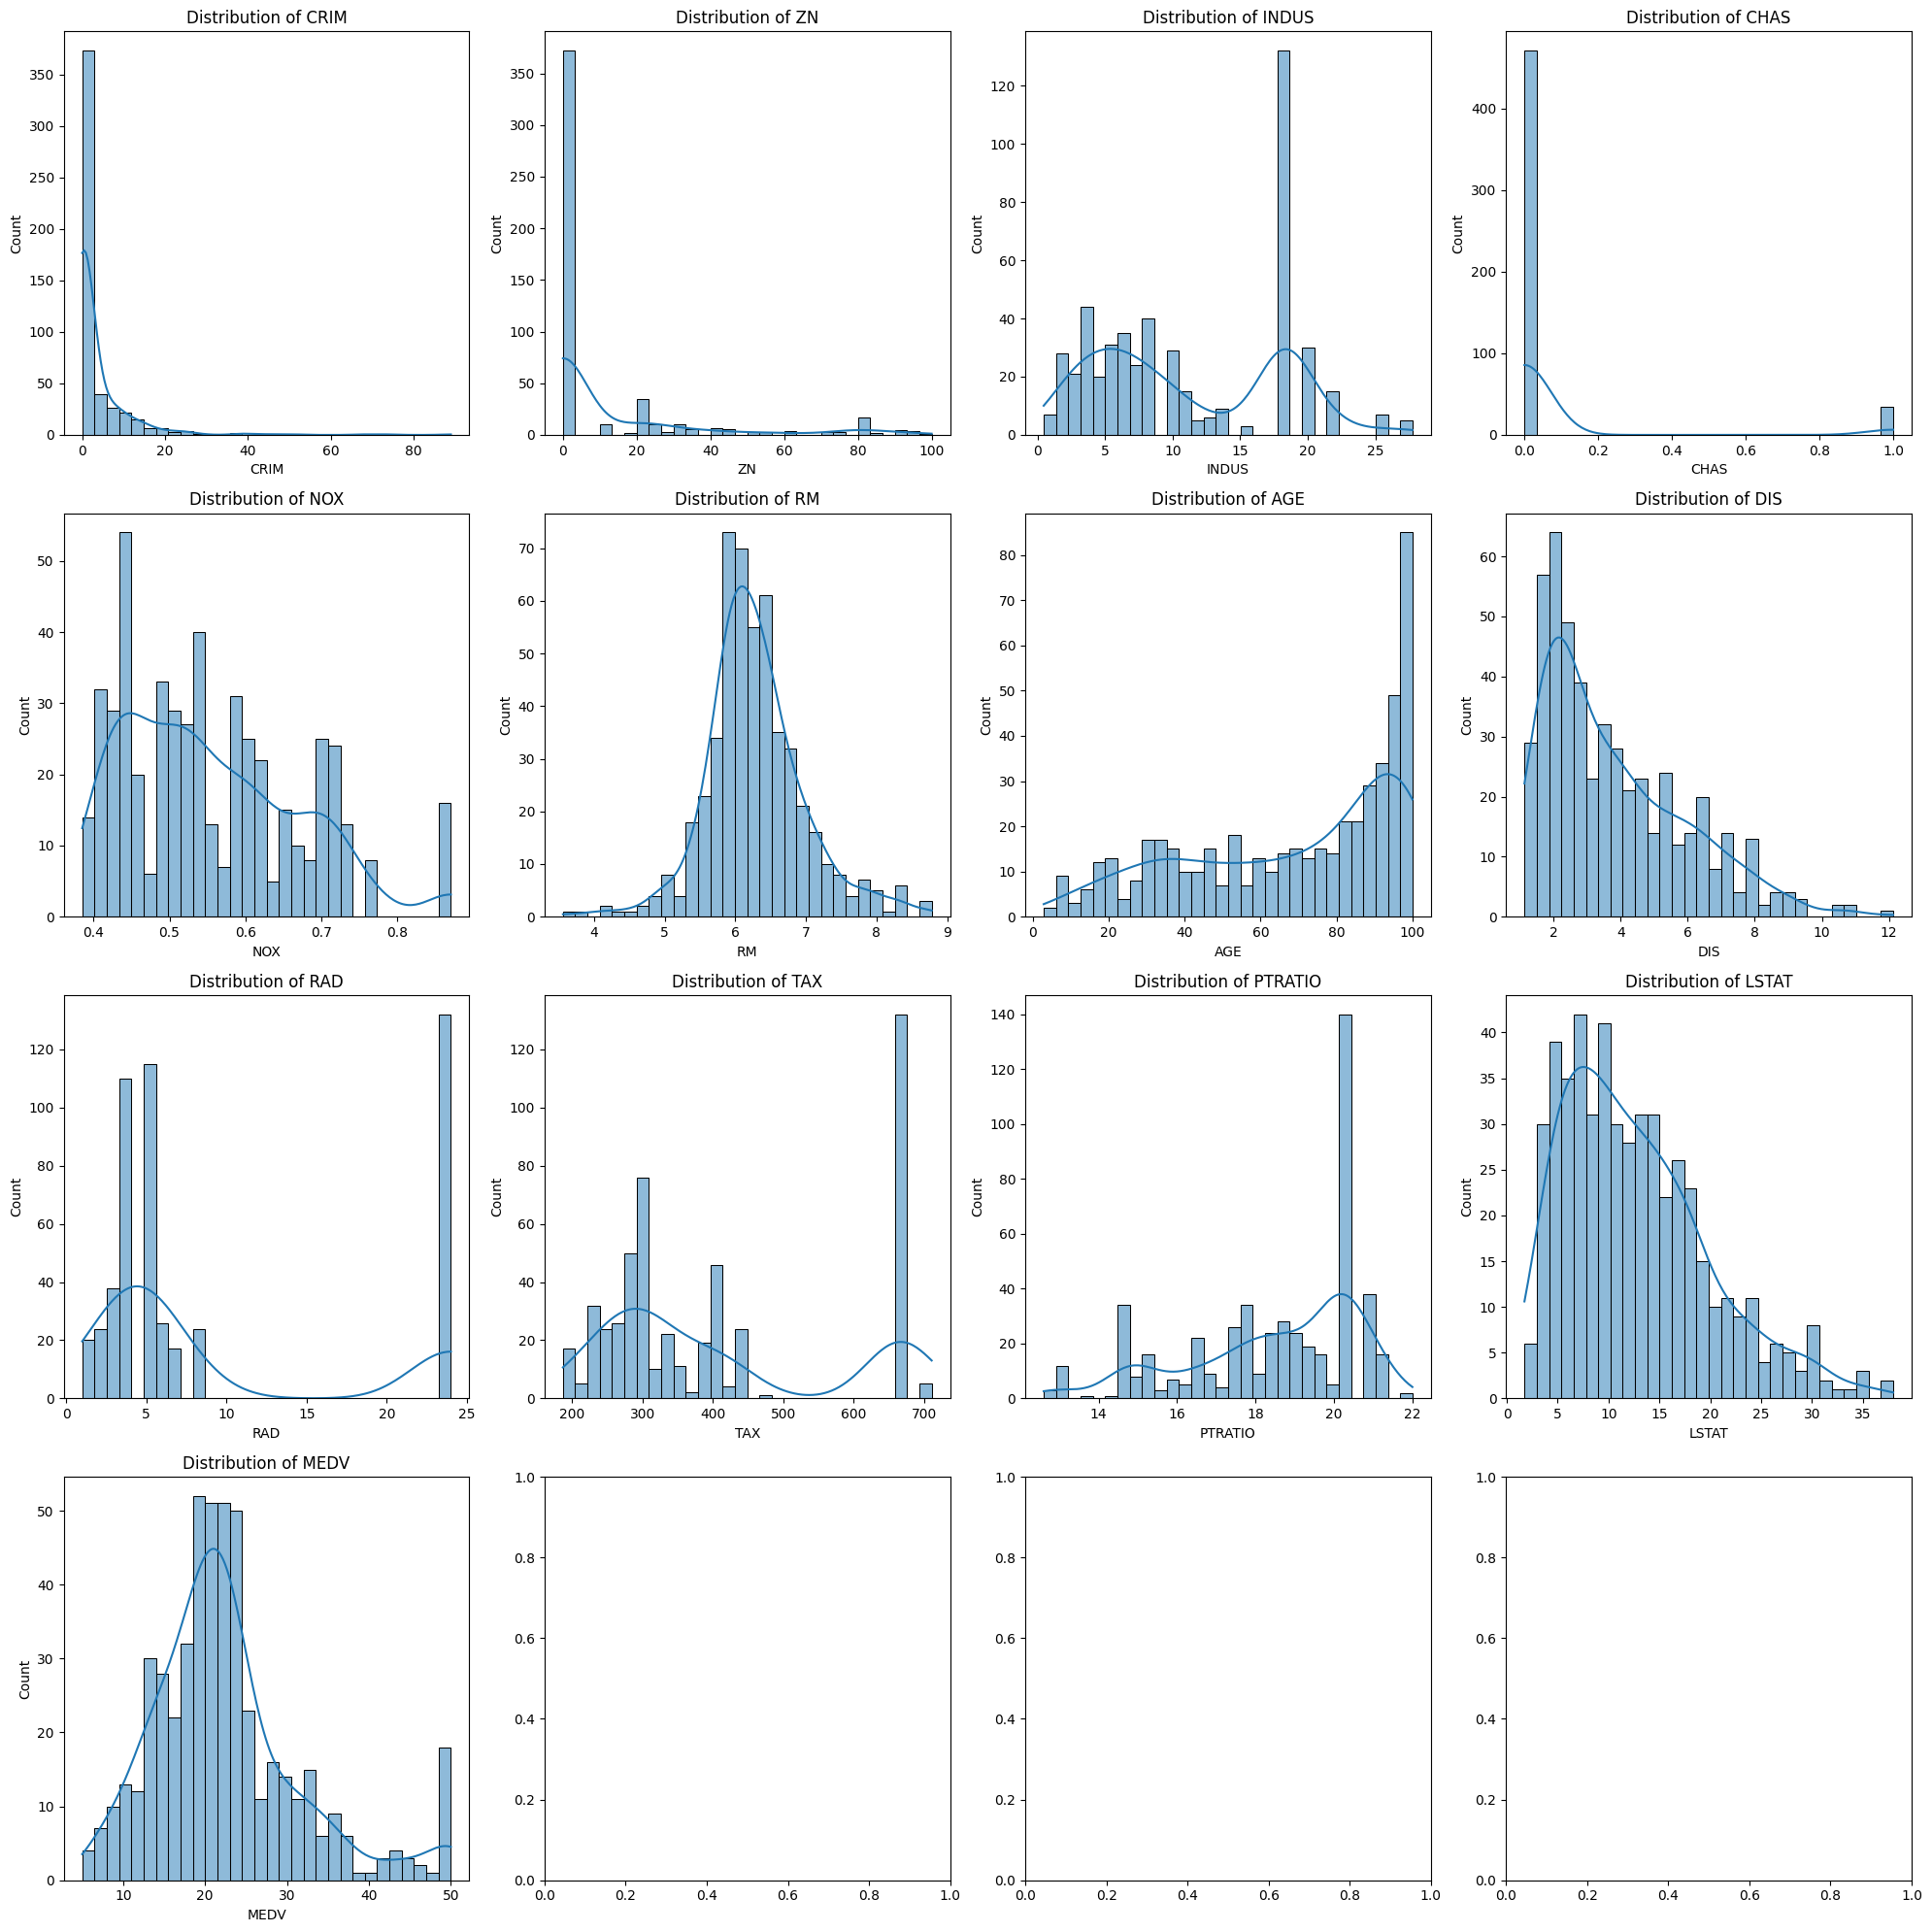

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(boston_df.columns):
    sns.histplot(boston_df[col], kde=True, ax=axs[i], bins=30)
    axs[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

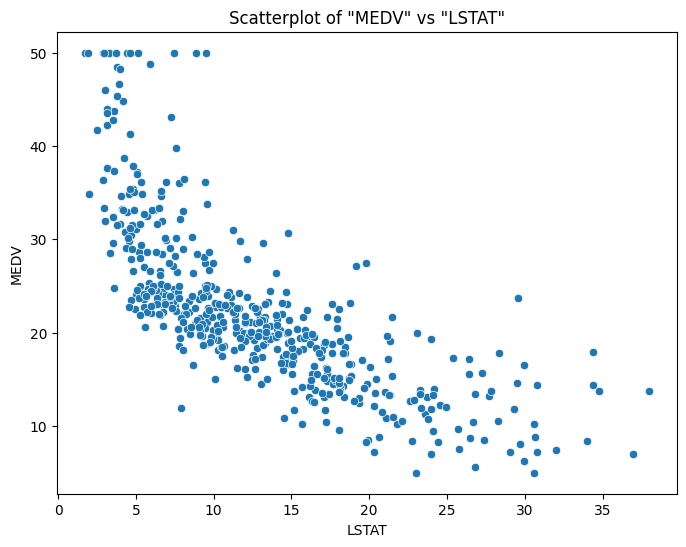

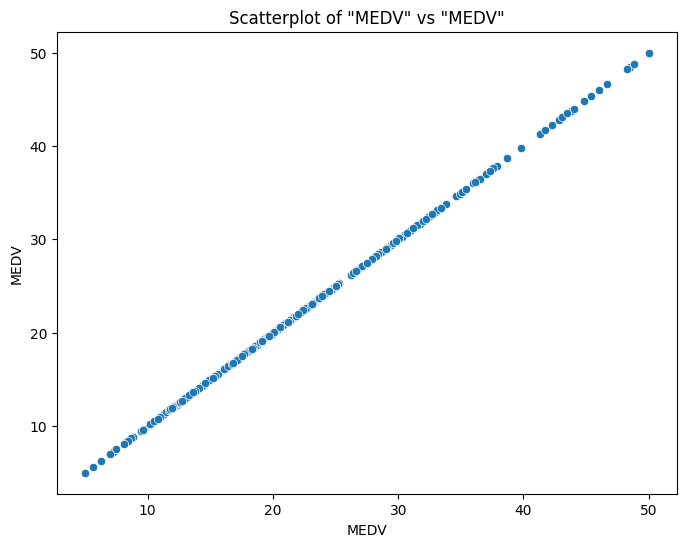

In [ ]:
# Bivariate Analysis
for col in boston_df.columns:
    if abs(correlation_matrix['MEDV'][col]) >= 0.7:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=boston_df[col], y=boston_df['MEDV'])
        plt.title(f'Scatterplot of "MEDV" vs "{col}"')
        plt.show()

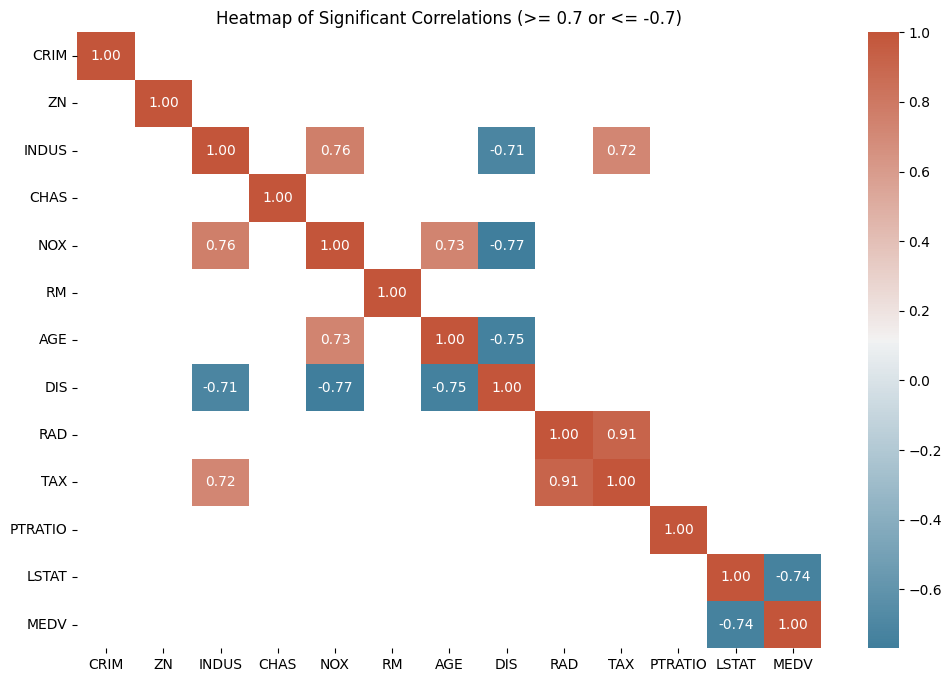

In [ ]:
# Bivariate Analysis Correlation Heatmap
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.7) | (correlation_matrix <= -0.7)], annot=True, fmt='.2f', cmap=cmap)
plt.title('Heatmap of Significant Correlations (>= 0.7 or <= -0.7)')
plt.show()

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Check for missing values
print("Missing values in the dataset:")
print(boston_df.isnull().sum())

Missing values in the dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


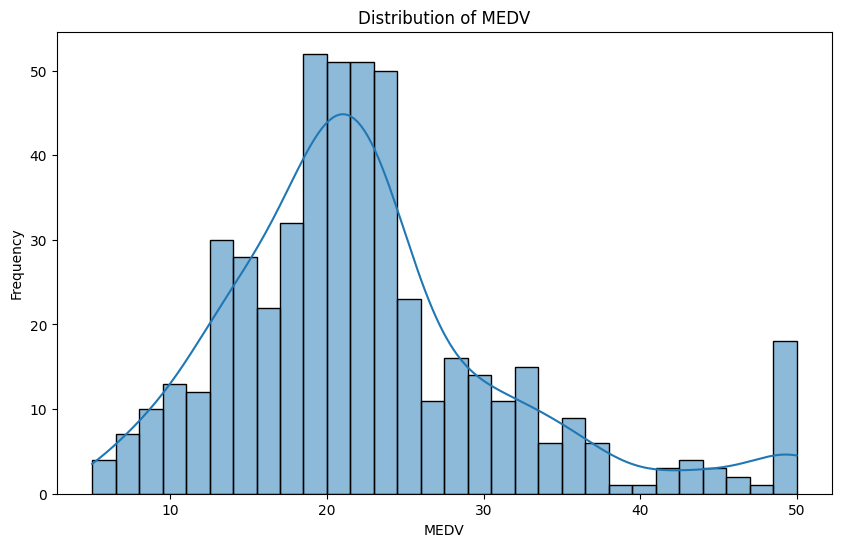

In [ ]:
# Check the distribution of the dependent variable 'MEDV'
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['MEDV'], kde=True, bins=30)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Apply log transformation if skewed
if boston_df['MEDV'].skew() > 0.5:
    boston_df['MEDV'] = np.log1p(boston_df['MEDV'])
    plt.figure(figsize=(10, 6))
    sns.histplot(boston_df['MEDV'], kde=True, bins=30)
    plt.title('Log-transformed Distribution of MEDV')
    plt.xlabel('Log(MEDV)')
    plt.ylabel('Frequency')
    plt.show()


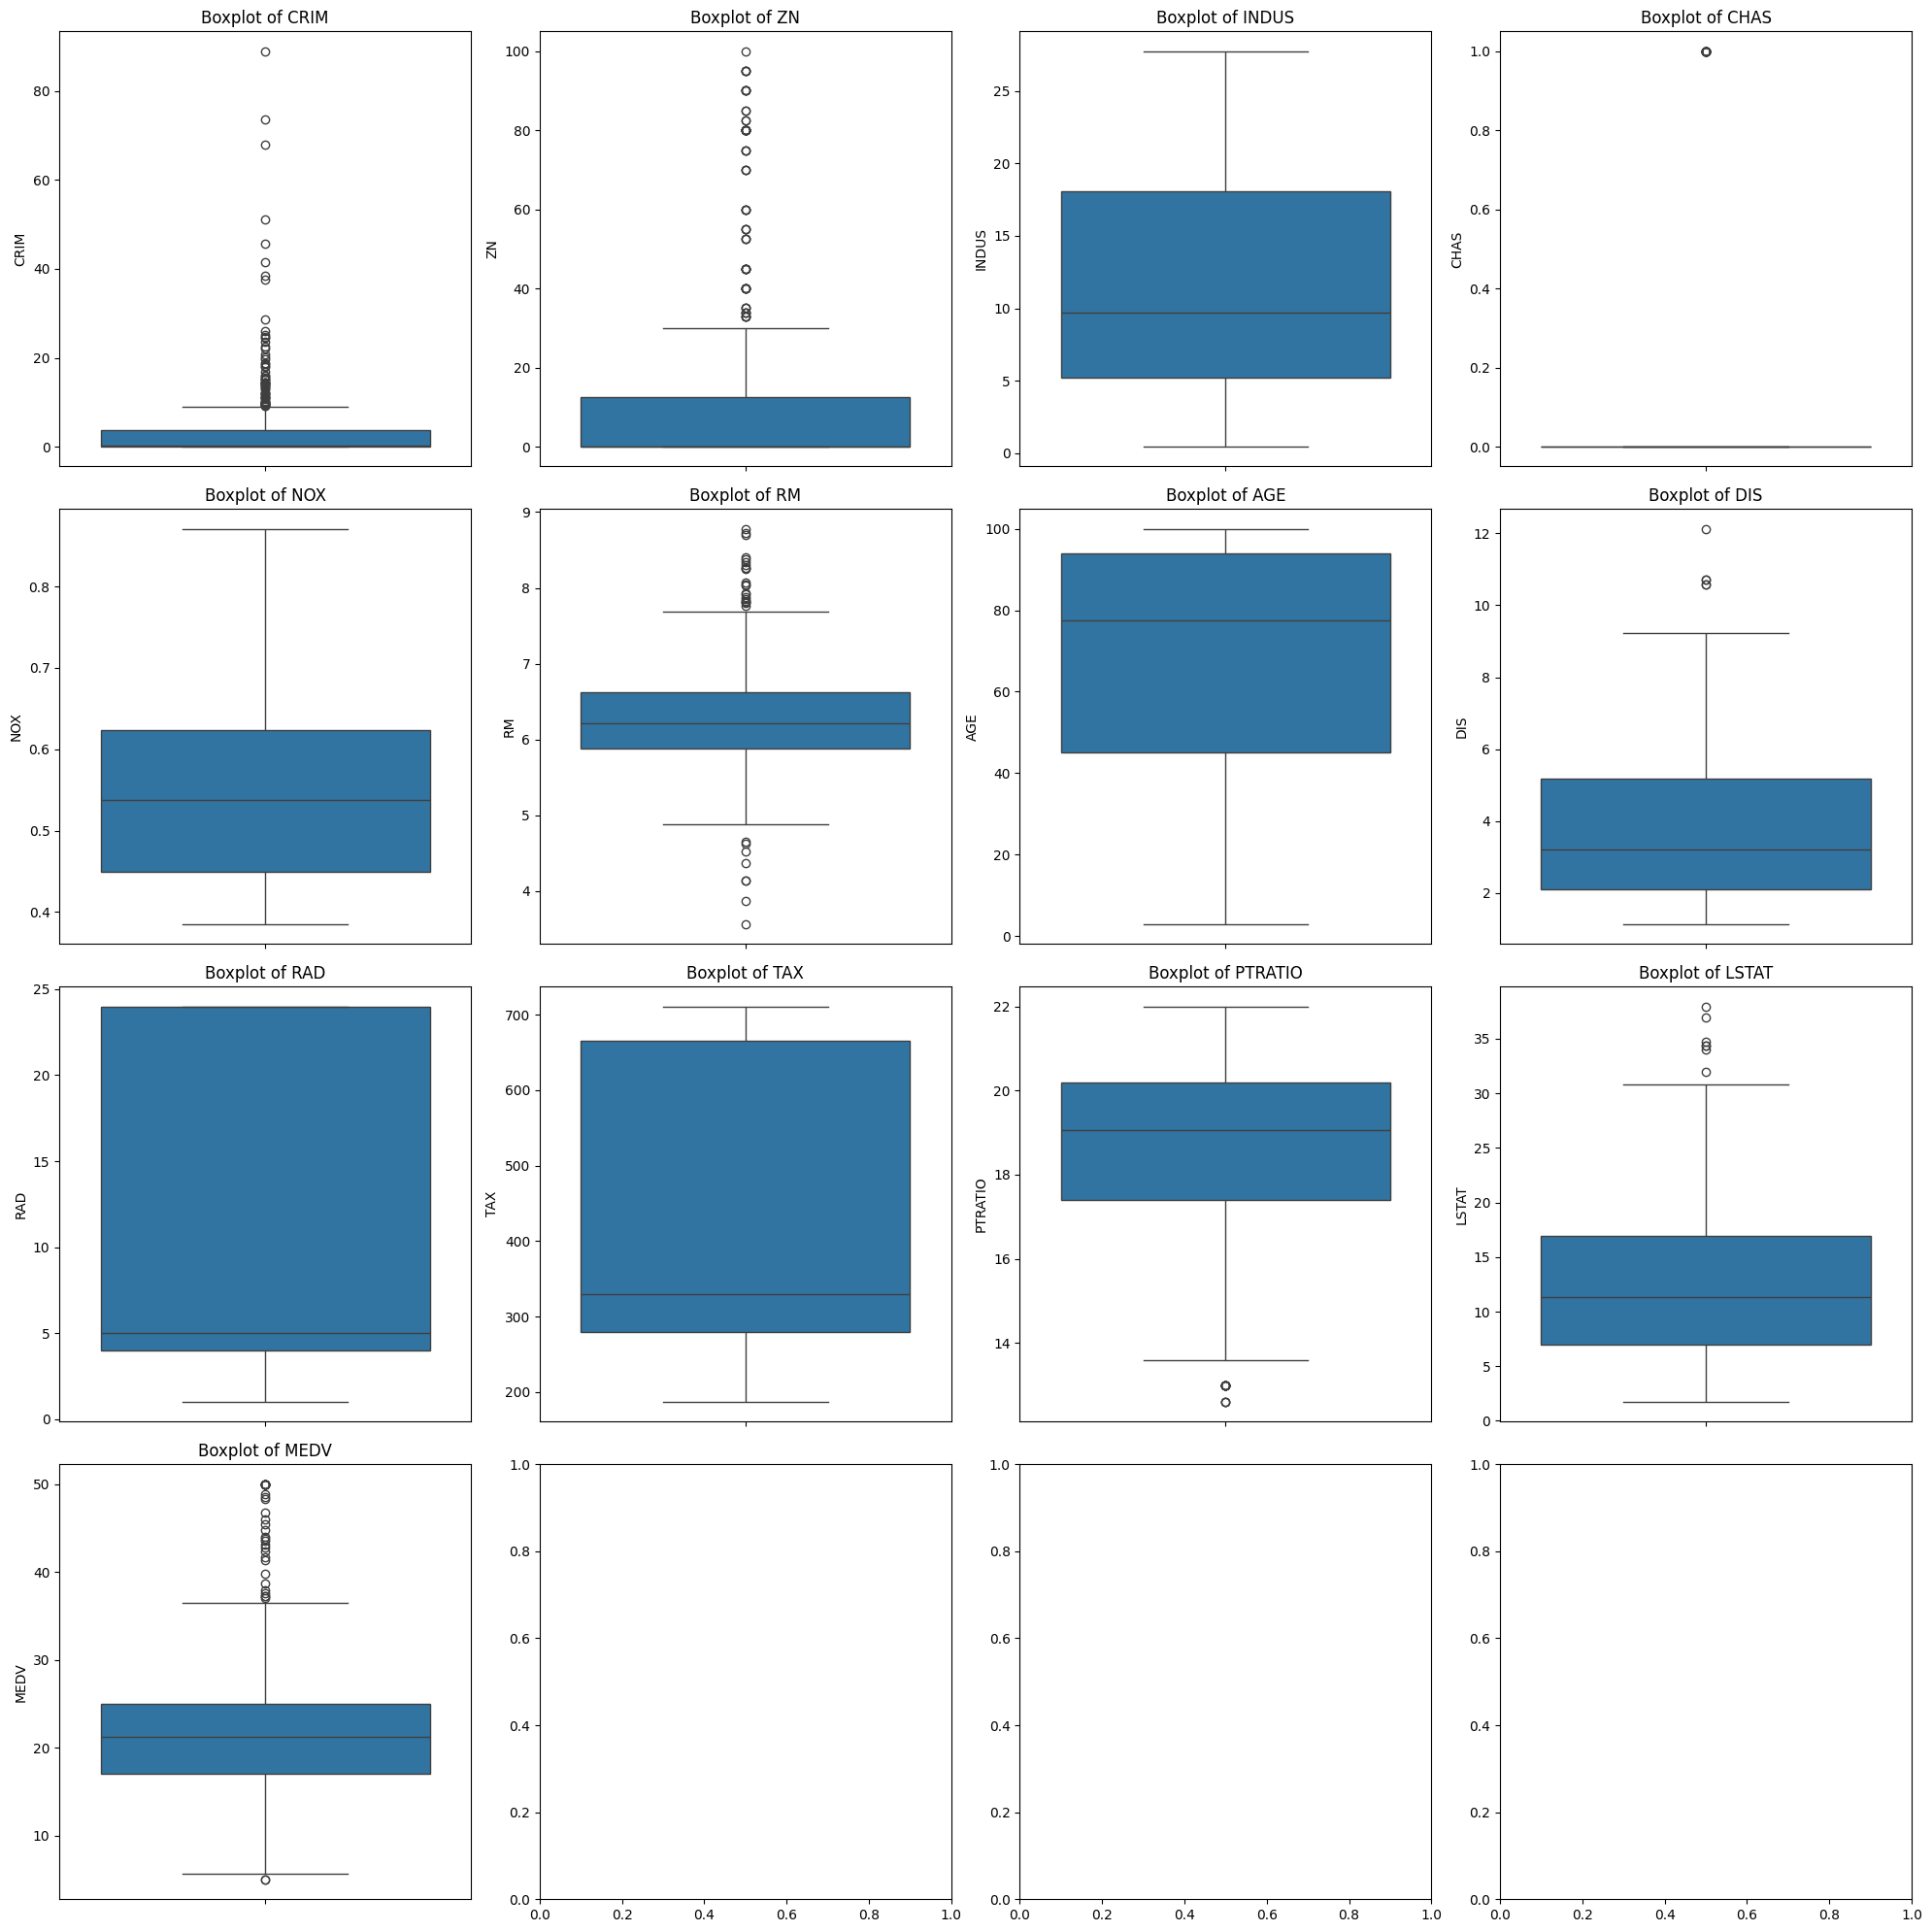

In [ ]:
# Detecting and visualizing outliers using boxplots
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(boston_df.columns):
    sns.boxplot(y=boston_df[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Outlier treatment (e.g., capping or removal)
def cap_outliers(df, col):
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

for col in boston_df.columns:
    if col != 'CHAS':
        cap_outliers(boston_df, col)

In [ ]:
# Splitting the data into features and target variable
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MAE: {mae_train}')
print(f'Training MSE: {mse_train}')
print(f'Training R-squared: {r2_train}')
print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test R-squared: {r2_test}')

Training MAE: 3.3913398640376555
Training MSE: 22.085947667887183
Training R-squared: 0.74477252568853
Test MAE: 3.1018020251303073
Test MSE: 21.961386318841924
Test R-squared: 0.697990296369809


In [ ]:
# Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
CRIM       -1.148672
ZN          0.651177
INDUS       0.160563
CHAS        0.785897
NOX        -2.130014
RM          3.124957
AGE        -0.205549
DIS        -3.196382
RAD         2.147078
TAX        -1.863252
PTRATIO    -2.000071
LSTAT      -3.671016


## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
  - **Test MAE**: The Mean Absolute Error on the test set is 3.10, indicating that on average, the model's predictions are off by about $3,100.
  - **Test MSE**: The Mean Squared Error on the test set is 21.96, which shows the average squared difference between the predicted and actual values.
  - **Test RMSE**: The Root Mean Squared Error on the test set is 4.69, providing a measure of the average magnitude of the errors in the same units as the target variable.
  - **Test R-squared**: The R-squared value on the test set is 0.70, indicating that 70% of the variance in the dependent variable (MEDV) is predictable from the independent variables.
  - **Test MAPE**: The Mean Absolute Percentage Error on the test set is 16.59%, which shows the average absolute percentage error between the predicted and actual values.

2. Is there multicollinearity? Check using VIF
  - - Features with high VIF values:
    - **NOX**: 75.03
    - **RM**: 81.83
    - **PTRATIO**: 80.58
    - **TAX**: 64.11
    - **AGE**: 21.76
    - **DIS**: 15.38
    - **RAD**: 16.34
    - **INDUS**: 14.50
    - VIF values greater than 10 indicate high multicollinearity, which can affect the stability and interpretation of the regression coefficients.
3. How does the model is performing after cross validation?
  - The **cross-validated RMSE** is 5.70, providing an estimate of the model's performance on unseen data.
  - Lower cross-validated RMSE indicates better generalization of the model.
  - Cross-validation helps ensure that the model's performance is consistent and reliable across different subsets of the data, indicating that the model has good predictive power and generalizes well to new data.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R-squared: {r2_test}')
print(f'Test MAPE: {mape_test}')

Test MAE: 3.1018020251303073
Test MSE: 21.961386318841924
Test RMSE: 4.686297719825526
Test R-squared: 0.697990296369809
Test MAPE: 16.586958161427756


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

    feature        VIF
0      CRIM   2.935537
1        ZN   2.836820
2     INDUS  14.498915
3      CHAS   1.149522
4       NOX  75.032975
5        RM  81.829119
6       AGE  21.757649
7       DIS  15.381307
8       RAD  16.336864
9       TAX  64.109059
10  PTRATIO  80.576590
11    LSTAT  11.788760


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and evaluate the model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f'Cross-validated RMSE: {cv_rmse.mean()}')

Cross-validated RMSE: 5.699942096719188


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

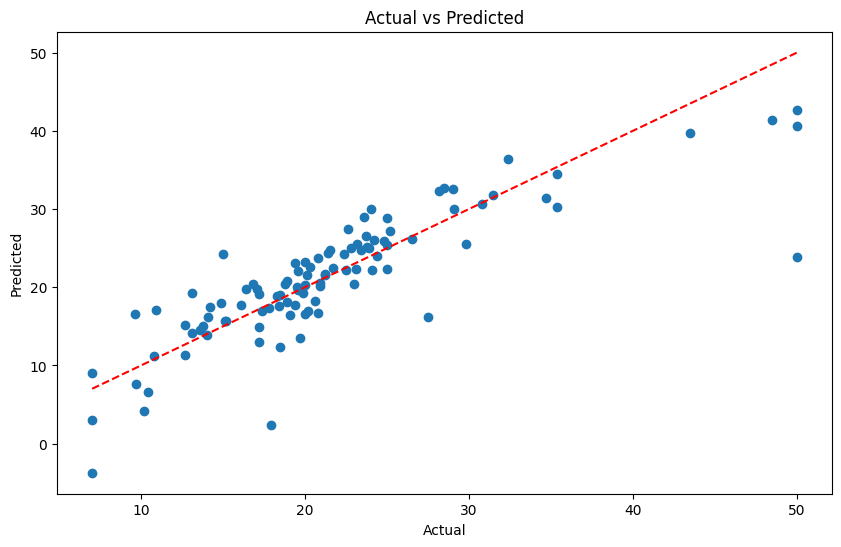

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# Durbin-Watson test for independence
dw = sm.stats.stattools.durbin_watson(y_test - y_pred_test)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 1.5761217156312441


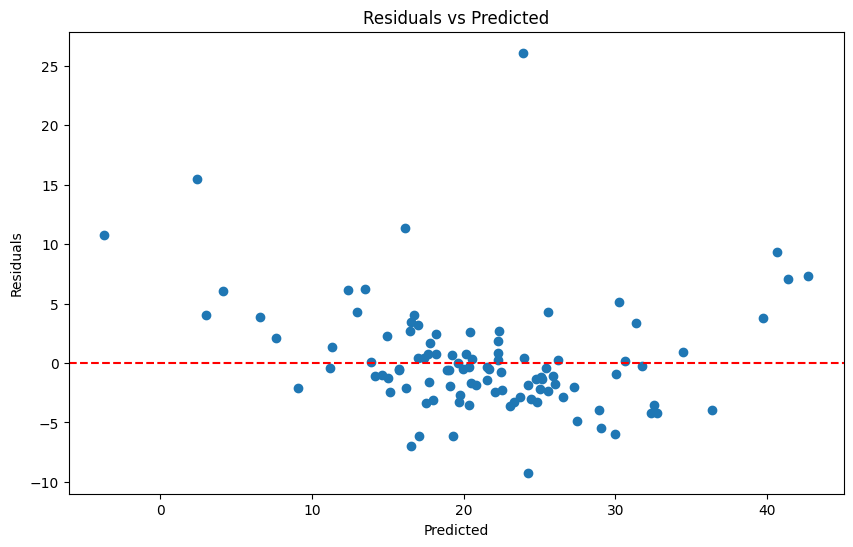

In [ ]:
# Plotting residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_test - y_pred_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

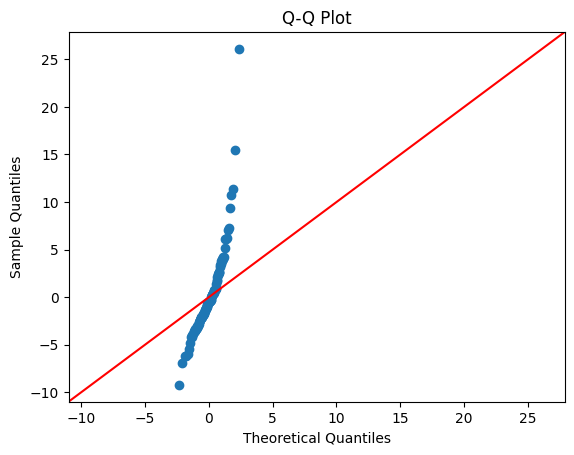

In [ ]:
# Q-Q plot for normality of residuals
sm.qqplot(y_test - y_pred_test, line='45')
plt.title('Q-Q Plot')
plt.show()

## Final Model

In [ ]:
# Summarizing the final model performance
print(f'Final Model Performance:')
print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R-squared: {r2_test}')
print(f'Test MAPE: {mape_test}')
print(f'Cross-validated RMSE: {cv_rmse.mean()}')

# Displaying model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Model Coefficients:')
print(coefficients)

Final Model Performance:
Test MAE: 3.1018020251303073
Test MSE: 21.961386318841924
Test RMSE: 4.686297719825526
Test R-squared: 0.697990296369809
Test MAPE: 16.586958161427756
Cross-validated RMSE: 5.699942096719188
Model Coefficients:
         Coefficient
CRIM       -1.148672
ZN          0.651177
INDUS       0.160563
CHAS        0.785897
NOX        -2.130014
RM          3.124957
AGE        -0.205549
DIS        -3.196382
RAD         2.147078
TAX        -1.863252
PTRATIO    -2.000071
LSTAT      -3.671016


## Actionable Insights and Recommendations

- High Importance of RM: The average number of rooms per dwelling (RM) has a strong positive relationship with home values. Real estate developers and investors should consider the number of rooms as a significant factor when evaluating properties.

- Negative Impact of LSTAT: The percentage of lower status of the population (LSTAT) has a negative impact on home values.

- Multicollinearity: The high VIF values indicate multicollinearity issues. Addressing these could involve removing or combining collinear features to improve the model's stability and interpretability.

- Refinements: While the current model performs well, further refinements such as regularization techniques could be explored to handle multicollinearity and improve model performance.


___